In [40]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [41]:
# Read into the clean_data csv
education_df = pd.read_csv('../csv/clean_data.csv')
education_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [42]:
# Convert Prevalent CHD to integer64 
education_df['PREVALENT CHD'] = np.where(education_df['PREVALENT CHD'] == 'YES', 1, 0)

education_df['PREVALENT CHD'] = education_df['PREVALENT CHD'].astype('int64')
education_df.head()


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,0,1,28.73
1,6238,F,260.0,52,NO,0,2,0,2,29.43
2,6238,F,237.0,58,NO,0,2,0,3,28.50
3,11263,F,228.0,43,NO,0,2,0,1,30.30
4,11263,F,230.0,49,NO,0,2,0,2,31.36


In [43]:
# Create new DataFrame for Period 1 only 
educationP1_df = education_df [education_df['PERIOD']==1]
educationP1_df.head()


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,0,1,28.73
3,11263,F,228.0,43,NO,0,2,0,1,30.30
6,14367,M,260.0,52,NO,0,1,0,1,26.36
9,16365,M,225.0,43,YES,30,1,0,1,23.61
12,23727,F,332.0,41,NO,0,3,0,1,31.31


In [44]:
# Creating a grouby by EDUCATION and SMOKING STATUS
groupedP1_df = educationP1_df.groupby(['EDUCATION', 'SMOKING STATUS'])['PREVALENT CHD'].count().reset_index()
groupedP1_df

,EDUCATION,SMOKING STATUS,PREVALENT CHD
0,1,NO,622
1,1,YES,481
2,2,NO,402
3,2,YES,446
4,3,NO,265
5,3,YES,196
6,4,NO,166
7,4,YES,176


In [45]:
# Pivot the SMOKING STATUS column, set EDUCATION as index.
pivotP1_df = groupedP1_df.pivot(index='EDUCATION', columns='SMOKING STATUS', values='PREVALENT CHD')
pivotP1_df


SMOKING STATUS,NO,YES
EDUCATION,,
1,622,481
2,402,446
3,265,196
4,166,176


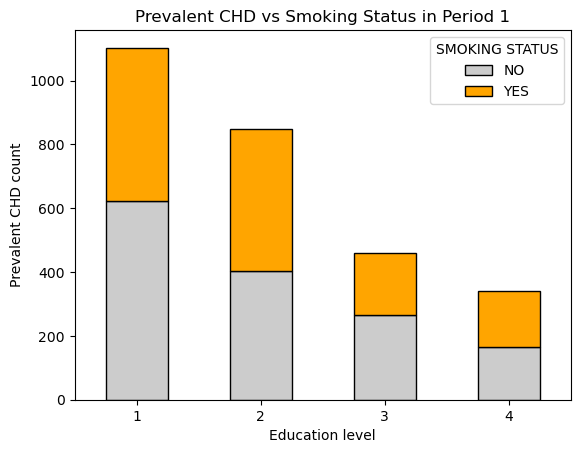

In [46]:
# Create bar chart, x = education level, y = prevalent CHD, and columns are stacked for smoking vs non-smoking
pivotP1_df.plot(kind='bar', stacked = True,
                color= ('0.80','orange'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs Smoking Status in Period 1')
plt.xlabel('Education level')
plt.ylabel('Prevalent CHD count')
plt.show()

In [47]:
# Create new DataFrame for Period 3 
educationP3_df = education_df[education_df['PERIOD'] == 3]
educationP3_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
2,6238,F,237.0,58,NO,0,2,0,3,28.50
5,11263,F,220.0,55,NO,0,2,0,3,31.17
8,14367,M,280.0,64,NO,0,1,0,3,25.72
11,16365,M,211.0,55,NO,0,1,0,3,29.11
14,23727,F,159.0,53,NO,0,3,0,3,26.62


In [48]:
# Create a grouby by EDUCATION and SMOKING status 
groupedP3_df = educationP3_df.groupby(['EDUCATION','SMOKING STATUS'])['PREVALENT CHD'].count().reset_index()
groupedP3_df

,EDUCATION,SMOKING STATUS,PREVALENT CHD
0,1,NO,764
1,1,YES,339
2,2,NO,501
3,2,YES,347
4,3,NO,326
5,3,YES,135
6,4,NO,229
7,4,YES,113


In [49]:
# Pivot the SMOKING status column 
pivotP3_df = groupedP3_df.pivot(index = 'EDUCATION', columns= 'SMOKING STATUS', values= 'PREVALENT CHD')
pivotP3_df

SMOKING STATUS,NO,YES
EDUCATION,,
1,764,339
2,501,347
3,326,135
4,229,113


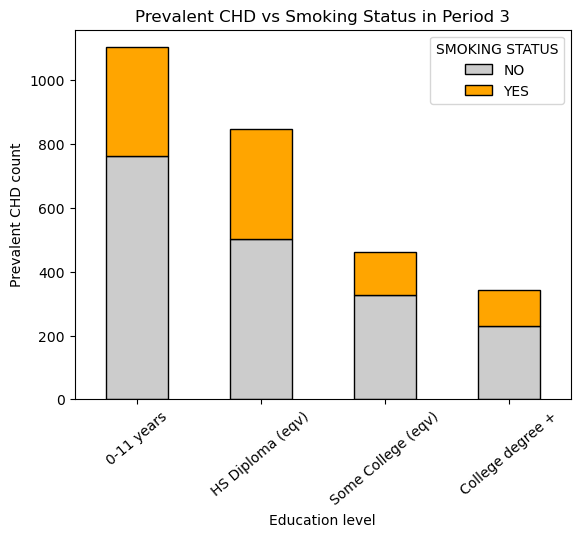

In [59]:
# Create bar chart, x = education level, y = prevalent CHD, and columns are stacked for smoking vs non-smoking

pivotP3_df.plot(kind='bar', stacked= True, 
                color= ('0.80', 'orange'), rot = 40, edgecolor = 'black')

labels = ['0-11 years','HS Diploma (eqv)',
          'Some College (eqv)','College degree +']

plt.xticks(ticks=[0, 1, 2, 3], labels=labels)
plt.title('Prevalent CHD vs Smoking Status in Period 3')
plt.xlabel('Education level')
plt.ylabel('Prevalent CHD count')

plt.show()